In [20]:
# Step 1 : import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [18]:
# step 2 : defining dataset
np.random.seed(42)
# Independent variable (Experience in years)
x = np.array([[i] for i in range(1, 11)])
# Dependent variable (Salary in $1000s)
true_salaries = np.array([10 + (i - 1) * 3 for i in range(1, 11)])

print(x)
print(true_salaries)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[10 13 16 19 22 25 28 31 34 37]


In [7]:
# adding noise to the dataset
noise = np.random.normal(0, 10, size=true_salaries.shape)  # More variation (std=10)
y = true_salaries + noise
print(noise)
print(y)

[ -4.63417693  -4.65729754   2.41962272 -19.13280245 -17.24917833
  -5.62287529 -10.1283112    3.14247333  -9.08024076 -14.12303701]
[ 5.36582307  8.34270246 18.41962272 -0.13280245  4.75082167 19.37712471
 17.8716888  34.14247333 24.91975924 22.87696299]


In [22]:
# OLS
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(x)  # Transforming X to polynomial features

In [23]:
# step 3 : create linear regression model
model = LinearRegression()

In [24]:
# step 4 : train the model using the dataset
model.fit(x,y)

LinearRegression()

In [25]:
# step 5 : calculate slpoe and intercept
coefficient = model.coef_[0]
print(f"Coefficient: {coefficient}")

#calculate intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Coefficient: 2.550870827334923
Intercept: 1.5636281038337803


In [26]:
# step 6 : display the equation of the line
print(f"Equation of the line : Y = {coefficient:.2f}x + {intercept :.2f}")

Equation of the line : Y = 2.55x + 1.56


In [27]:
# step 7 : Predict values using the model
Y_pred = model.predict(x)
Y_pred
# predict salaries for the given experience values

array([ 4.11449893,  6.66536976,  9.21624059, 11.76711141, 14.31798224,
       16.86885307, 19.4197239 , 21.97059472, 24.52146555, 27.07233638])

In [30]:
# step 8 : model evaluation metrics used to error handling
mse = mean_squared_error(y, Y_pred)
print ('MSE : ',mse)
mae = mean_absolute_error(y, Y_pred)
print('MAE :', mae)
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  49.68222746721135
MAE : 5.442096582889718
RMSE :  7.048562085078867


In [31]:
# step 9 : model accuracy using R square and adjusted R square
r_square = r2_score(y, Y_pred)
print('R square :',r_square)
# adjusted r square
# no of obvs
n = len(y)
# no of independent variables
p =1
adj = 1 -((1-r_square)*(n-1)/(n-p-1))
print("Adjusted r square : ",adj)

R square : 0.5193492151380987
Adjusted r square :  0.45926786703036104


In [33]:
#  Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     3.910
Date:                Sat, 01 Mar 2025   Prob (F-statistic):             0.0724
Time:                        07:03:36   Log-Likelihood:                -33.630
No. Observations:                  10   AIC:                             73.26
Df Residuals:                       7   BIC:                             74.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3712     

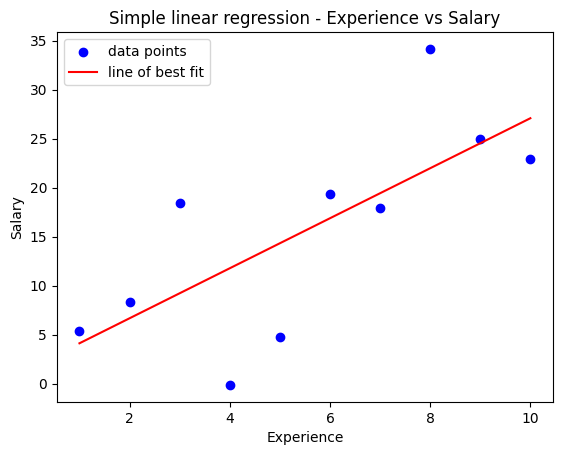

In [34]:
# visualization
plt.scatter(x,y, color = 'blue', label = 'data points')
# step 9 : plot the regression line
plt.plot(x,Y_pred, color = 'red', label = 'line of best fit')
# step 10: add labels and legend
plt.xlabel('Experience')
plt.ylabel('Salary')

plt.title('Simple linear regression - Experience vs Salary')
plt.legend()
plt.show()